In [35]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("Lenna.png", 0)
np_img = np.array(img)

In [36]:
def bilinear_scaling(scale, img):
    img_h, img_w = img.shape[:2]
    new_h, new_w = int(scale*img_h), int(scale*img_w)
    
    rescaled_img = np.empty([new_h, new_w])
    
    x_ratio = float(img_w - 1) / (new_w - 1) if new_w > 1 else 0
    y_ratio = float(img_h - 1) / (new_h - 1) if new_h > 1 else 0
    
    for i in range(new_h):
        for j in range(new_w):
           
            x_l, y_l = math.floor(j * x_ratio), math.floor(i * y_ratio)
            x_h, y_h = math.ceil(j * x_ratio), math.ceil(i * y_ratio)
            
            x_weight = j * x_ratio - x_l
            y_weight = i * y_ratio - y_l
            
            a = img[y_l, x_l]
            b = img[y_l, x_h]
            c = img[y_h, x_l]
            d = img[y_h, x_h]
            
            pixel = a * (1 - x_weight) * (1 - y_weight) + b * (x_weight) * (1 - y_weight) + c *(1 - x_weight) * (y_weight) +  d * (x_weight) * (y_weight)
            
            rescaled_img[i][j] = pixel
            
    return rescaled_img

In [40]:
def image_scaling(scale):
    rescaled_img = bilinear_scaling(scale, np_img)
    plt.imshow(rescaled_img, cmap = "gray")
    plt.title("Bilinear scaling x" + str(scale))
    plt.show()

    inbuilt_img = cv2.resize(img,None,fx = scale, fy = scale, interpolation = cv2.INTER_LINEAR)
    plt.imshow(inbuilt_img, cmap = "gray")
    plt.title("Inbuilt scaling x" + str(scale))
    plt.show()    

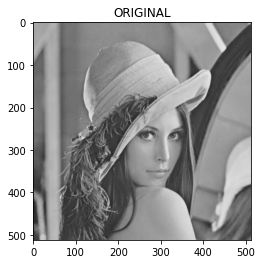

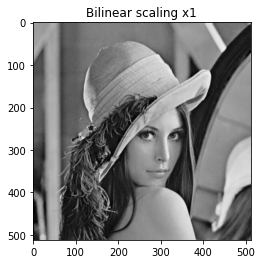

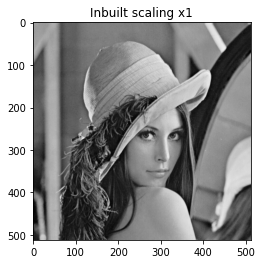

In [41]:
#SCALING BY 1
plt.title('ORIGINAL')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

image_scaling(1)

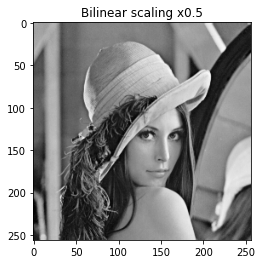

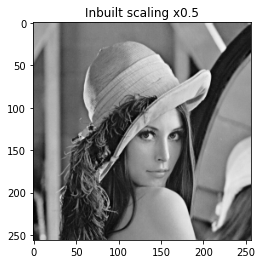

In [42]:
#SCALING BY 0.5
image_scaling(0.5)

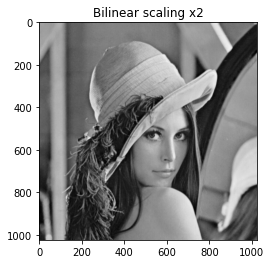

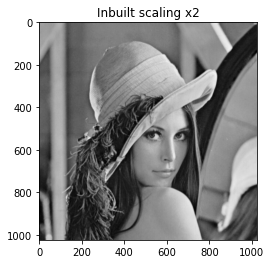

In [44]:
#SCALING BY 2
image_scaling(2)